In [2]:
# import pandas as pd

# # Read an Excel file
# file_path = 'state_M2022_dl.xlsx'  # Replace with your Excel file path
# df = pd.read_excel(file_path)

# # Define the regular expression for the pattern 'xx-0000'
# # The pattern \d{2}-0000 will match any string that has two digits followed by '-0000'
# pattern = r'\d{2}-0000'

# # Filter rows where the column matches the pattern
# filtered_df = df[df['OCC_CODE'].str.contains(pattern, na=False)]

# # Save the filtered DataFrame to a new Excel file, if needed
# output_path = 'filtered_state_M2022_dl.xlsx'
# filtered_df.to_excel(output_path, index=False)


/tmp/ipykernel_116/667453026.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')


54


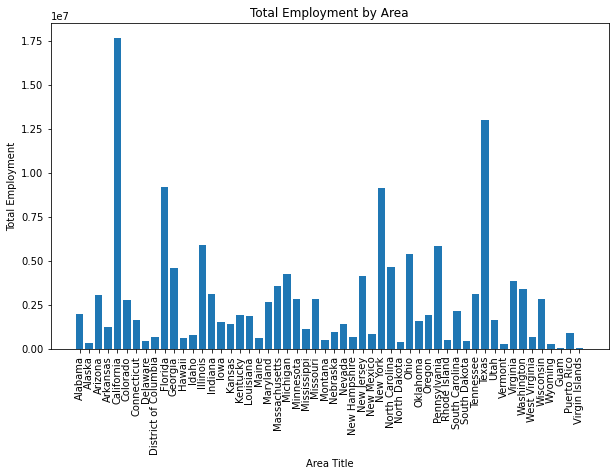

0                    Alabama
23                    Alaska
46                   Arizona
69                  Arkansas
92                California
115                 Colorado
138              Connecticut
161                 Delaware
184     District of Columbia
207                  Florida
230                  Georgia
253                   Hawaii
276                    Idaho
299                 Illinois
322                  Indiana
345                     Iowa
368                   Kansas
391                 Kentucky
414                Louisiana
437                    Maine
460                 Maryland
483            Massachusetts
506                 Michigan
529                Minnesota
552              Mississippi
575                 Missouri
598                  Montana
621                 Nebraska
644                   Nevada
667            New Hampshire
690               New Jersey
713               New Mexico
736                 New York
759           North Carolina
782           

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read an Excel file
file_path = 'filtered_state_M2022_dl.csv'  # Replace with your Excel file path
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Plot a bar chart
plt.figure(figsize=(10, 6))
# Convert 'TOT_EMP' to numeric, if it's not already
filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')
print(len(filtered_df['AREA_TITLE']))
plt.bar(filtered_df['AREA_TITLE'], filtered_df['TOT_EMP'])
plt.xlabel('Area Title')
plt.ylabel('Total Employment')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Total Employment by Area')

# Adjust the y-axis to better display the data
plt.yscale('linear')  # Ensures a linear scale for y-axis

plt.show()
print(filtered_df['AREA_TITLE'])
# print(filtered_df['TOT_EMP'])

In [38]:
import pandas as pd

# Load the dataset
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Calculate the mean and variance of 'A_MEAN' across different states for each occupation
mean_across_states = data.groupby('OCC_TITLE')['A_MEAN'].mean()
std_across_states = data.groupby('OCC_TITLE')['A_MEAN'].std()

# Combine the results into a single DataFrame
occupation_stats_df = pd.DataFrame({
    'Mean Across States': mean_across_states, 
    'Std Across States': std_across_states
}).reset_index()

# Display the results for the first few occupations
occupation_stats_df.head()

,OCC_TITLE,Mean Across States,Std Across States
0,All Occupations,58383.333333,10425.979163
1,Architecture and Engineering Occupations,89263.333333,11249.353692
2,"Arts, Design, Entertainment, Sports, and Media...",62931.296296,14135.888096
3,Building and Grounds Cleaning and Maintenance ...,34642.222222,4793.419100
4,Business and Financial Operations Occupations,79464.259259,11384.553521


In [43]:
occupation_stats_df.sort_values('Mean Across States', ascending=False, inplace=True)

In [46]:
occupation_stats_df.head()

,OCC_TITLE,Mean Across States,Std Across States
16,Management Occupations,119520.925926,21582.768482
14,Legal Occupations,106124.074074,24960.674543
6,Computer and Mathematical Occupations,93762.222222,17375.644271
11,Healthcare Practitioners and Technical Occupat...,93050.000000,13798.494175
1,Architecture and Engineering Occupations,89263.333333,11249.353692


In [19]:
import pandas as pd

# Load the dataset
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Calculate the mean and variance of 'A_MEAN' among different occupations within each state
mean_among_occupations = data.groupby('AREA_TITLE')['A_MEAN'].mean()
variance_among_occupations = data.groupby('AREA_TITLE')['A_MEAN'].var()

# Combine the results into a single DataFrame for display
variance_among_occupations_df = pd.DataFrame({
    'Mean Among Occupations': mean_among_occupations, 
    'Variance Among Occupations': variance_among_occupations
}).reset_index()

# Display the DataFrame
variance_among_occupations_df.head()


,AREA_TITLE,Mean Among Occupations,Variance Among Occupations
0,Alabama,55554.782609,6.297621e+08
1,Alaska,67402.608696,5.752129e+08
2,Arizona,60648.695652,5.923155e+08
3,Arkansas,52295.217391,3.959236e+08
4,California,78291.739130,1.445946e+09


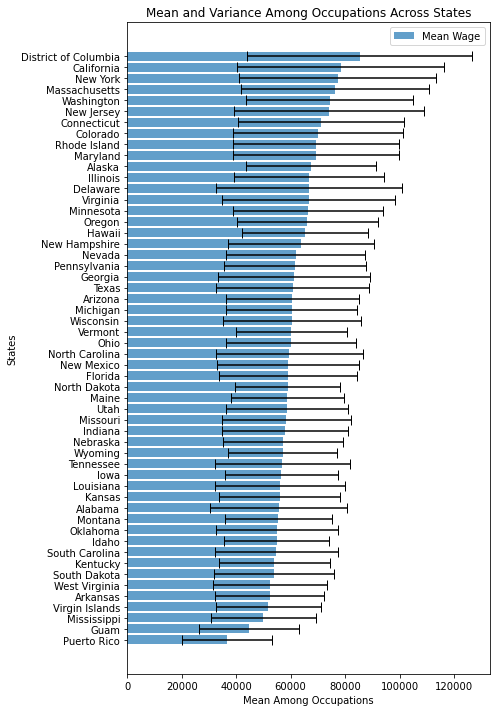

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have calculated variance_among_occupations_df as described in the previous code snippet

# Sort the DataFrame by mean among occupations
variance_among_occupations_df.sort_values('Mean Among Occupations', ascending=True, inplace=True)

plt.figure(figsize=(7, 10))

plt.barh(variance_among_occupations_df['AREA_TITLE'],
         variance_among_occupations_df['Mean Among Occupations'], 
         xerr=variance_among_occupations_df['Variance Among Occupations']**0.5, 
         capsize=5, alpha=0.7, label='Mean Wage')

plt.legend()

plt.xlabel('Mean Among Occupations')
plt.ylabel('States')
plt.title('Mean and Variance Among Occupations Across States')
# plt.grid(True)
plt.tight_layout()

plt.show()

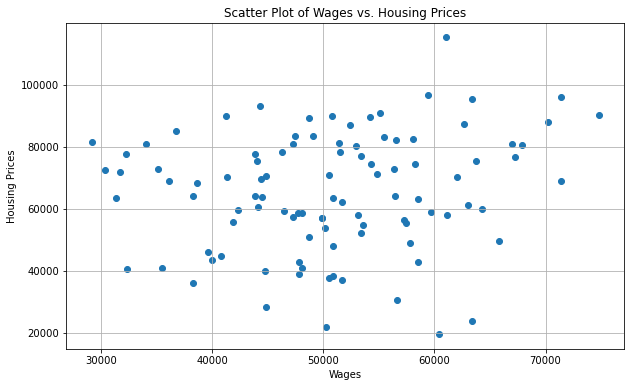

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical data
wages = np.random.normal(50000, 10000, 100)  # Mean wage, standard deviation, number of samples
housing_prices = wages * 0.3 + np.random.normal(50000, 20000, 100)  # Assuming some relationship between wages and housing

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(wages, housing_prices)
plt.title('Scatter Plot of Wages vs. Housing Prices')
plt.xlabel('Wages')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.show()


In [55]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# # Convert the hypothetical data to a DataFrame
# df = pd.DataFrame({'Wages': wages, 'Housing Prices': housing_prices})

# # Perform linear regression
# model = LinearRegression()
# model.fit(df[['Wages']], df['Housing Prices'])

# # Predict values for the given wage range
# predicted = model.predict(df[['Wages']])

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Wages'], df['Housing Prices'], color='blue')  # actual data points
# plt.plot(df['Wages'], predicted, color='red', linewidth=3)  # regression line
# plt.title('Linear Regression Analysis of Wages vs. Housing Prices')
# plt.xlabel('Wages')
# plt.ylabel('Housing Prices')
# plt.grid(True)
# plt.show()


In [54]:
# # Hypothetical data for three states
# groups = pd.DataFrame({
#     'State': ['State A', 'State B', 'State C'] * 100,
#     'Wages': np.random.normal(50000, 10000, 300),
#     'Housing Prices': np.random.normal(200000, 50000, 300)
# })

# # Group by state and calculate average
# grouped = groups.groupby('State').mean().reset_index()

# # Plot grouped bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(grouped['State'], grouped['Wages'], color='blue', label='Wages')
# plt.bar(grouped['State'], grouped['Housing Prices'], color='green', label='Housing Prices', alpha=0.5)
# plt.title('Comparative Analysis of Average Wages and Housing Prices by State')
# plt.xlabel('State')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)
# plt.show()
